QUESTION 1

In [1]:
import numpy as np
import pandas as pd

Data

In [2]:
# Importing the dataset from textfile
dataset = pd.read_csv('simple-food-reviews.txt', header  = None, names=['reviews'])
# Print dataset
print(dataset)
dataset.head(18)

reviews = dataset["reviews"]

                                              reviews
0                                1 the food is lovely
1                        1 this is a great restaurant
2                          1 i really enjoyed my food
3        1 i enjoyed the experience at the restaurant
4                              1 we had a lovely meal
5                              1 my food tasted great
6                             1 the service was great
7                          1 what a lovely restaurant
8   1 the food the service and the restaurant was ...
9                          -1 the service is terrible
10                           -1 the food tasted awful
11                      -1 this is a bad restaurant  
12                         -1 the food was really bad
13           -1 the service and the food was terrible
14                    -1 we had a terrible experience
15                           -1 avoid this restaurant
16                                  -1 avoid the food
17                          

Split Data into Training and Test Data

In [3]:
# Splitting the dataset into the Training set and Test set without sklearn
AllReviews = []

for i in reviews:
    s = i.split(" ")
    AllReviews.append(s)

np.random.shuffle(AllReviews)

trainingData = AllReviews[:12]
testData = AllReviews[-6:]

for sentence in testData:
    for word in sentence:
        n = len(word)
        if(word =='1'or word =='-1'):
            continue
        elif(n <= 2):
            sentence.remove(word)
            
for sentence in trainingData:
   for word in sentence:
        n = len(word)
        if(word =='1'or word =='-1'):
            continue
        elif(n <= 2):
            sentence.remove(word)


Laplace

In [4]:
#finding the most occuring words using dictionary
posReviews = []
negReviews = []

for sentence in trainingData:
    if (sentence[0] == '1'):
        posReviews.append(sentence)
    if (sentence[0] == '-1'):
        negReviews.append(sentence)

print("positive:")           
for i in posReviews:
    print(i)

print("negative:")
for i in negReviews:
    print(i)
        
def WordCount(trainingData):
    wordDict = {}
    for sentence in trainingData:
        for word in sentence:
            if (word=='1' or word=='-1'):
                continue
            if(word in wordDict):
                wordDict[word] += 1
            else:
                wordDict[word] = 1
    return wordDict

#print the most occuring words
wordDict = WordCount(trainingData)
print(wordDict)



positive:
['1', 'really', 'enjoyed', 'food']
['1', 'what', 'lovely', 'restaurant']
['1', 'the', 'service', 'was', 'great']
['1', 'this', 'a', 'great', 'restaurant']
['1', 'the', 'food', 'the', 'service', 'and', 'the', 'restaurant', 'was', 'great']
['1', 'had', 'lovely', 'meal']
['1', 'the', 'food', 'lovely']
negative:
['-1', 'the', 'meal', 'was', 'terrible']
['-1', 'avoid', 'this', 'restaurant']
['-1', 'the', 'service', 'terrible']
['-1', 'the', 'service', 'and', 'the', 'food', 'was', 'terrible']
['-1', 'had', 'terrible', 'experience']
{'really': 1, 'enjoyed': 1, 'food': 4, 'the': 9, 'meal': 2, 'was': 4, 'terrible': 4, 'what': 1, 'lovely': 3, 'restaurant': 4, 'avoid': 1, 'this': 2, 'service': 4, 'great': 3, 'a': 1, 'and': 2, 'had': 2, 'experience': 1}


TRAINING MODEL

Laplace Smoothing Parameter, Priority and Conditional Probabilities 

In [5]:
#finding the most occuring words using dictionary split into positive and negative reviews
wordCountInPos = WordCount(posReviews)
wordCountInNeg = WordCount(negReviews)
totalWordCount = WordCount(trainingData)

#print the most occuring words
# print(wordCountInPos)
# print(wordCountInNeg)
# print(totalWordCount)

#Prior Probabilities
posProb = len(posReviews) / len(trainingData)
negProb = len(negReviews) / len(trainingData)

# Print probabilities
# print("Positive:", posProb)
# print("Negative:", negProb)

# Probability of each word
def getWordProb(noReviews, CountWords):
    probabilities = {}
    
    for word in CountWords:
        probabilities[word] = CountWords[word] / len(noReviews)
        
    return probabilities

# print(wordCountInNeg["this"])

probOfWordInPos = getWordProb(posReviews, wordCountInPos) 
probOfWordInNeg = getWordProb(negReviews, wordCountInNeg) 

# print(len(posReviews))
# for i in wordCountInNeg:
#     print(i, wordCountInPos[i])
# probOfWordInPos

# print(negProb)
# print(posProb)

TESTING MODEL

In [6]:
def Likelihood(positive,negative):
    likelihood = []
    for w in wordDict:
        likelihood.append([w,0,0])

    numPositive = len(posReviews)
    numNegative = len(negReviews)
    
    #Calculating the likelihood probabilities 
    for l in likelihood:
        word = l[0]
        p1 = 0
        n1 = 0 
        for p in positive:
            if( word in p):
                p1+=1
        for n in negative:
            if(word in n):
                n1+=1
        #Smoothing since we had 0's 
        if(p1==0):
            l[1] = 1/(numPositive+2)
            l[2] = n1/numNegative
        if(n1==0):
            l[1] = p1/numPositive
            l[2] = 1/(numNegative+2)
        if(n1!=0 and p1!=0):
            l[1] = p1/numPositive
            l[2] = n1/numNegative
    return likelihood

likelihood = Likelihood(posReviews,negReviews)
likelihood

[['really', 0.14285714285714285, 0.14285714285714285],
 ['enjoyed', 0.14285714285714285, 0.14285714285714285],
 ['food', 0.42857142857142855, 0.2],
 ['the', 0.42857142857142855, 0.6],
 ['meal', 0.14285714285714285, 0.2],
 ['was', 0.2857142857142857, 0.4],
 ['terrible', 0.1111111111111111, 0.8],
 ['what', 0.14285714285714285, 0.14285714285714285],
 ['lovely', 0.42857142857142855, 0.14285714285714285],
 ['restaurant', 0.42857142857142855, 0.2],
 ['avoid', 0.1111111111111111, 0.2],
 ['this', 0.14285714285714285, 0.2],
 ['service', 0.2857142857142857, 0.4],
 ['great', 0.42857142857142855, 0.14285714285714285],
 ['a', 0.14285714285714285, 0.14285714285714285],
 ['and', 0.14285714285714285, 0.2],
 ['had', 0.14285714285714285, 0.2],
 ['experience', 0.1111111111111111, 0.2]]

EVALUATING MODEL

In [7]:
#Encode the test data
def encode(testData):
    tests=[]
    for i in testData:
        encoded=[]
        for l in likelihood:
            if(l[0] in i):
                encoded.append(1)
            else:
                encoded.append(0)
        tests.append(encoded)
    return tests
encodedTests=encode(testData)
print(encodedTests)

[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


In [8]:
#calc p(test|good) and p(test|bad)

def LikelihoodProb(tests):
    results=[ ]
    
    for t in tests:
        pg=1
        pb=1
        for i in range(len(t)):
            if(t[i]==1):
                pg*=likelihood[i][1]
                pb*=likelihood[i][2]
            elif(t[i]==0):
                pg*=(1-likelihood[i][1])
                pb*=(1-likelihood[i][2])
        results.append([pg,pb])
    return results
results=LikelihoodProb(encodedTests)
results

[[0.00044725411046343507, 0.00017963994867607896],
 [0.0001325197364336104, 1.995999429734211e-05],
 [0.0002385355255804988, 7.983997718936844e-05],
 [7.454235174390586e-05, 2.9939991446013144e-05],
 [0.0035780328837074805, 0.0007185597947043158],
 [0.0035780328837074823, 7.983997718936844e-05]]

In [9]:
#posProbability
def posProbability(results):
    final=[ ]
    for r in results:
        pg=(r[0]*posProb)/((r[0]*posProb)+(r[1]*negProb))
        pb=(r[1]*negProb)/((r[1]*negProb)+(r[0]*posProb))
        final.append([pg,pb])
    return final
final=posProbability(results)

final

[[0.7770651445089053, 0.2229348554910947],
 [0.9028652247658485, 0.09713477523415147],
 [0.807051807522896, 0.1929481924771041],
 [0.7770651445089054, 0.2229348554910946],
 [0.8745488559156321, 0.1254511440843679],
 [0.9843115292286727, 0.01568847077132724]]

In [10]:
#Now we can construct confusion Matrix
#We already know whether our test reviews were good or bad so we can use that 
#Column 0 and Row 0 will be Good Reviews
#Column 1 and Row 1 will be bad Reviews

confusion = np.zeros((2,2))

#Holds the true results from the type
actualTypeOfReview = []

#Holds the result from my model
modelResult = []
for t in testData:
    actualTypeOfReview.append(t[0])
    
for f in final:
    #Note that 0 will be a postive prediction and 1 will be a negative prediction for review type
    modelResult.append(f.index(max(f)))
    
actualPositive = len(np.where(np.asarray(actualTypeOfReview) == '1')[0])
actualNegative = len(np.where(np.asarray(actualTypeOfReview)=='-1')[0])
modelPositive = len(np.where(np.asarray(modelResult)==0)[0])
modelNegative = len(np.where(np.asarray(modelResult)==1)[0])

for i in range(len(modelResult)):
    if(modelResult[i]==0 and actualTypeOfReview[i]=="1"):
        confusion[0][0]+=1
    elif(modelResult[i]==1 and actualTypeOfReview[i]=="-1"):
        confusion[1][1] +=1 
    elif(modelResult[i]==0 and actualTypeOfReview[i]=="-1"):
        confusion[0][1]+=1
    elif(modelResult[i]==1 and actualTypeOfReview[i]=="1"):
        confusion[1][0]+=1

print(confusion)
accuracy = sum(np.diag(confusion))/(np.sum(confusion))
print(accuracy*100)

[[2. 4.]
 [0. 0.]]
33.33333333333333


In [11]:


#Our own Good REVIEW
review = "I loved the food"
a = review.split(" ")
b = encode([a])
c = LikelihoodProb(b)
d = posProbability(c)

print(d)


#Our own Bad REVIEW
s = "I saw a rat on the floor"
a = s.split(" ")
b = encode([a])
c = LikelihoodProb(b)
d = posProbability(c)

print(d)

[[0.8745488559156321, 0.1254511440843679]]
[[0.6991344281542023, 0.30086557184579765]]


QUESTION 2

In [12]:
import numpy as np
import pandas as pd
import random

In [13]:
dataset = pd.read_csv("smalldigits.csv",header = None)
allMatrices = []
classNumbers = []

# iterate over each row in the data and reshape it into an 8x8 matrix
for i, row in dataset.iterrows():
    m = row[:64].values.reshape(8, 8)
    allMatrices.append(m)
    classNumbers.append(row[64])

In [14]:
#Splitting into training and test data randomly    
randomIndices = random.sample(range(1797),1437)


trainingData = []
trainingClass = []

testData = []
testClass = []

for i in range(1797):
    if i in randomIndices:
        trainingData.append(allMatrices[i])
        trainingClass.append(classNumbers[i])
    else:
        testData.append(allMatrices[i])
        testClass.append(classNumbers[i])

In [15]:
likelihood = np.zeros((64,10))
y_vals = np.unique(trainingClass)
priorProbabilities = []
n = len(y_vals)
divisors = []
for i in range(n):
    indices = np.where(trainingClass == y_vals[i])
    matrices = np.asarray(trainingData)[indices]
    divisors.append(len(indices[0]))
    priorProbabilities.append(divisors[i]/len(trainingClass))
    for m in matrices:
        curr = m.flatten(order='A')
        length = len(curr) 
        for j in range(length):
            if(curr[j]==1):
                likelihood[j][i]+=1
            else:
                likelihood[j][i]+=1/2
likelihood = np.divide(likelihood,divisors)

In [16]:
answers = []

for t in testData:
    probs =[]
    test = t.flatten(order="A")
    for i in range(10):
        
        probability = 1
        for j in range(64):
            val = test[j]
            if(val==1):
                probability*=likelihood[j][i]
            elif(val==0):
                probability*=(1-likelihood[j][i])
        probs.append(probability)
    
    answers.append(probs)

In [17]:
# Calculate confusion matrix
num_classes = 10
confusion_matrix = np.zeros((num_classes, num_classes))

model_result = np.argmax(answers, axis=1)
wrong_predictions = []
for i, (predicted, actual) in enumerate(zip(model_result, testClass)):
    confusion_matrix[predicted, actual] += 1
    if predicted != actual:
        wrong_predictions.append([predicted, actual, i])

accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print("Confusion matrix:\n", confusion_matrix)
print("Model accuracy: {:.2f}%".format(accuracy * 100))

Confusion matrix:
 [[36.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 27.  0.  1.  0.  1.  1.  0.  9.  2.]
 [ 0.  2. 25.  3.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  2. 35.  0.  1.  0.  0.  5.  2.]
 [ 0.  0.  0.  0. 37.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0. 26.  0.  1.  1.  1.]
 [ 1.  0.  1.  0.  0.  0. 36.  0.  0.  0.]
 [ 0.  1.  0.  3.  1.  0.  0. 45.  1.  1.]
 [ 0.  1.  1.  0.  0.  0.  1.  0. 17.  1.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  3. 21.]]
Model accuracy: 84.72%


QUESTION 3

Import Libaries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
sns.set_style("darkgrid")

Load Data from CSV

In [19]:
data = pd.read_csv("banknote_authentication.csv", sep=';')

#Print the data
data.head(100)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.666100,-2.80730,-0.446990,0
1,4.54590,8.167400,-2.45860,-1.462100,0
2,3.86600,-2.638300,1.92420,0.106450,0
3,3.45660,9.522800,-4.01120,-3.594400,0
4,0.32924,-4.455200,4.57180,-0.988800,0
...,...,...,...,...,...
95,-4.29320,3.341900,0.77258,-0.997850,1
96,-3.02650,-0.062088,0.68604,-0.055186,1
97,-1.70150,-0.010356,-0.99337,-0.531040,1
98,-0.64326,2.474800,-2.94520,-1.027600,1


Data being Split and Histograms

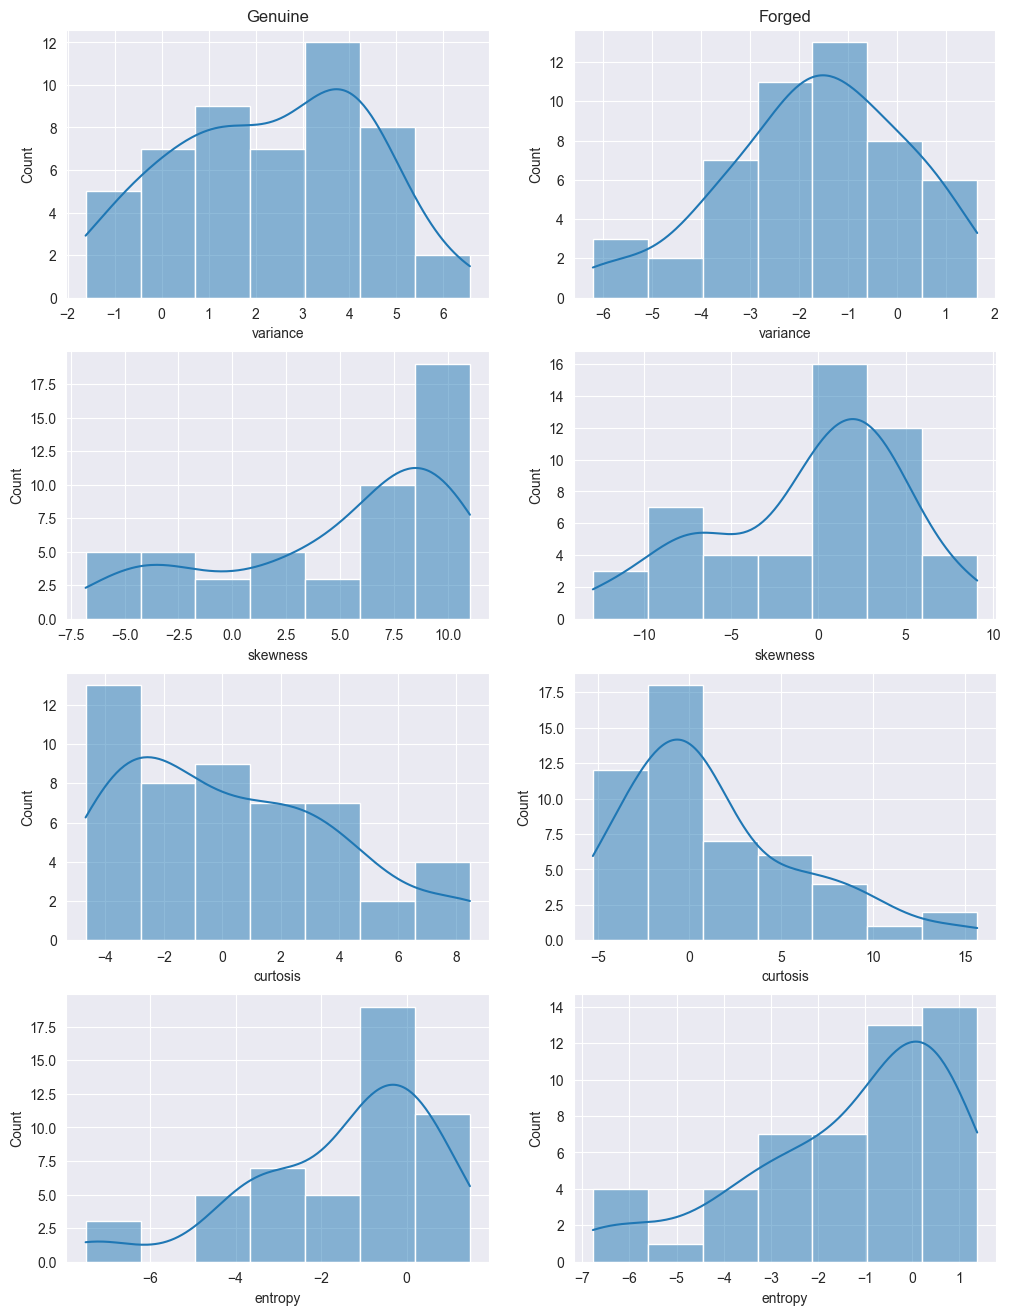

In [20]:
genuine = data[data['class'] == 0]
forged = data[data['class'] == 1]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
sns.histplot(genuine['variance'], ax=axes[0,0], kde=True).set_title('Genuine')
sns.histplot(forged['variance'], ax=axes[0,1], kde=True).set_title('Forged')
sns.histplot(genuine['skewness'], ax=axes[1,0], kde=True)
sns.histplot(forged['skewness'], ax=axes[1,1], kde=True)
sns.histplot(genuine['curtosis'], ax=axes[2,0], kde=True)
sns.histplot(forged['curtosis'], ax=axes[2,1], kde=True)
sns.histplot(genuine['entropy'], ax=axes[3,0], kde=True)
sns.histplot(forged['entropy'], ax=axes[3,1], kde=True)
plt.show()


NB classifer and Confusion Matrix

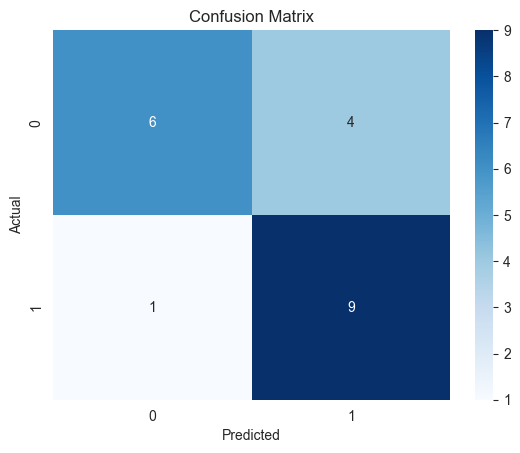

[[6 4]
 [1 9]]
75.0


In [21]:
#Setting the features and targets variables
Features = data.drop('class', axis=1).values
Targets = data['class'].values

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(Features, Targets, test_size=0.2, random_state=0)

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted = model.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, predicted)
#Seaborn Heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(cm)

#Accuracy
accuracy = sum(np.diag(cm))/(np.sum(cm))
print(accuracy*100)



QUESTION 4